# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

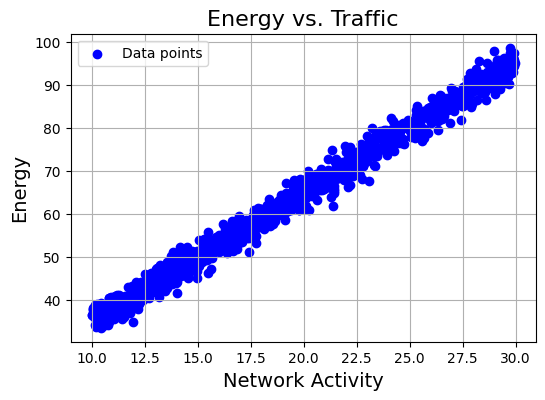

In [46]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

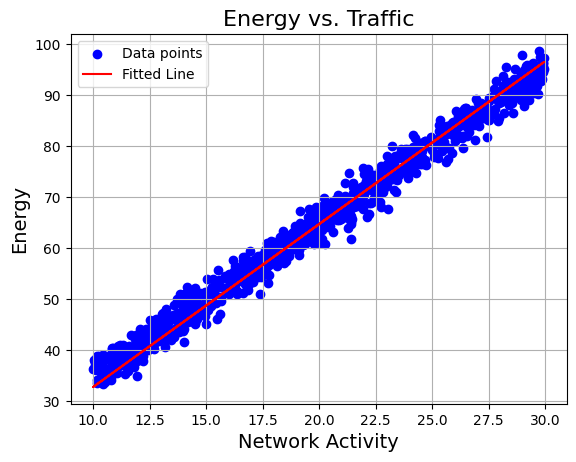

Energy Consumption Formula:
y = 3.1969432275799208x + 0.8138340222229041


In [47]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])
predictions = lr.predict(data['Net_Activity'])

plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, c='red', label='Fitted Line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

print("Energy Consumption Formula:")
print(f"y = {lr.weights[0]}x + {lr.bias}")

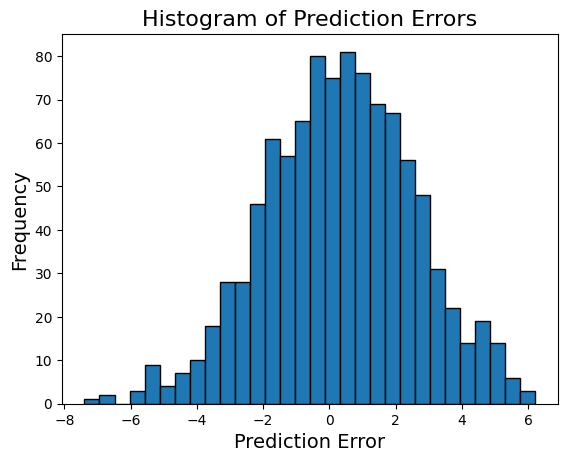

In [48]:
errors = data['Energy'] - predictions  # y: actual values, predictions: predicted values
plt.hist(errors, bins=30, edgecolor='k')
plt.xlabel('Prediction Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Prediction Errors', fontsize=16)
plt.show()

### Mission 1 - Discussion

    Questions:

    a. Visualize the fitted curve. Derive the resulting Energy consumption formula.

    b. Analyze prediction error distribution. What is an unbiased estimator?

    Answers:
    
    a) Energy Consumption Formula:
    y = 3.1969432275799208x + 0.8138340222229041

    b) An unbiased estimator is a statistical estimator that, on average, accurately estimates the parameter of interest. 
    In other words, the expected value of the estimator equals the true value of the parameter.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [49]:
data = pd.read_csv('mission2.csv')

train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

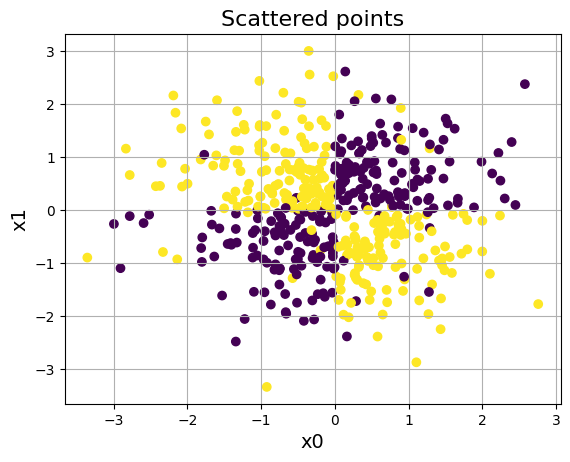

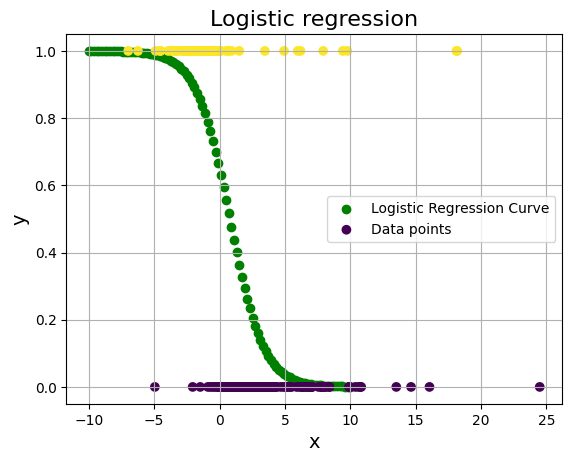

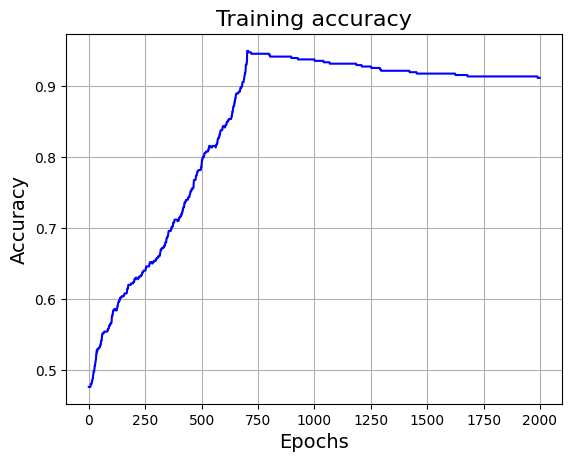

Accuracy: 0.912


In [50]:
# Transforms the x values to only be located in the first and second quadrants
def transform_x_values(d):
    result = (d["x0"] + d["x1"]) ** 2

    x0_is_positive = d["x0"] >= 0
    x1_is_positive = d["x1"] >= 0

    quadrant1 = x0_is_positive & x1_is_positive
    quadrant2 = ~x0_is_positive & x1_is_positive
    quadrant3 = ~x0_is_positive & ~x1_is_positive
    quadrant4 = x0_is_positive & ~x1_is_positive

    result[(quadrant1) | (quadrant3)] = result[(quadrant1) | (quadrant3)]
    result[(quadrant2) | (quadrant4)] = -result[(quadrant2) | (quadrant4)]
    
    return result


class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=2000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.train_accuracies = []

    def fit(self, X, y):

        if len(X.shape) == 1:
            X = np.array(X).reshape(-1, 1)
        else:
            X = np.array(X)
        y = np.array(y)

        self.weights = np.zeros(X.shape[1])

        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = self.predict_proba(X)
            grad_w, grad_b = self.compute_gradients(X, y, len(X), y_pred)
            self.update_parameters(grad_w, grad_b)

            pred_to_class = self.predict(X)
            self.train_accuracies.append(self._compute_accuracy(y, pred_to_class))

    def predict(self, X):
        y_pred = self.predict_proba(X)
        return np.array([1 if _y > 0.6 else 0 for _y in y_pred])
    
    def predict_proba(self, X):
        # Return predicted probabilities
        if len(X.shape) == 1:
            X = np.array(X).reshape(-1, 1)
        else:
            X = np.array(X)

        lin_model = np.matmul(X, self.weights) + self.bias
        y_pred = self.sigmoid_function(lin_model)
        return y_pred

    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))
    
    def compute_gradients(self, X, y, n, y_pred):
        dw = (1 / n) * np.matmul(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)
        return dw, db
    
    def update_parameters(self, grad_w, grad_b):
        self.weights -= self.learning_rate * grad_w
        self.bias -= self.learning_rate * grad_b

    def _compute_accuracy(self, true_values, predictions):
        return np.mean(true_values == predictions)
    

logreg = LogisticRegression()

X_train = transform_x_values(train)
X_test = transform_x_values(test)
y_train = train["y"]
y_test = test["y"]

x_evenly_spaced = np.linspace(-10, 10, 100)

logreg.fit(X_train, y_train)
predictions = logreg.predict_proba(x_evenly_spaced)

# Scattered points
plt.scatter(train["x0"], train["x1"], c=train["y"], label='Data points')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Scattered points', fontsize=16)
plt.show()

# Plot sigmoid function
plt.scatter(x_evenly_spaced, predictions, c="green", label='Logistic Regression Curve')
plt.scatter(X_train, y_train, c=y_train, label='Data points')
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Logistic regression', fontsize=16)
plt.legend()
plt.show()

#Plot accuracy
plt.plot(logreg.train_accuracies, c='blue', label='Train Accuracy')
plt.grid(True)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training accuracy', fontsize=16)
plt.show()

print("Accuracy: " + str(logreg.train_accuracies[-1]))


### Mission 2 - Discussion:
    
    Questions:

    a. Explain poor initial performance and your improvements

    b. What is the model's inductive bias. Why is it important?

    c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
    d. Plot the ROC curve

    Answers:
    
    a) When I first plotted the sigmoid function, I saw that it did really poor on the current data. After plotting the points and separating them with colors, showing which is 0 and which is 1, I could see that the points was mostly divided into quadrants. This is what made the sigmond fuction balance around 0.5, not being able to decide how it should act. Therefore, I first manipulated the data such that all the points was moved above the x-axis. This made a good separation of the points, and it was way easier to determine if a point should be 0 or 1. Unfortunately, the accuracy was still really bad. I tweaked the threshold for determining a 0 and 1 from 0.5 to 0.6. I also upped the learning rate fram 0.001 to 0.01. This made a nice graph for the accuracy and it stabilized around 0.91.


    b) Our inductive bias is that we assume that we have a linear regression model. This will of course only work if the relationship between the input features and the output is linear. This is important since it will help the model react better to new and unseen data.


    c) Under this box is the solution with "sklearn.tree.DecisionTreeClassifier". This solves the problem with a higher accuracy (0.928 > 0.912) than my solution. This solution divides the dots into regions by by making decisions in a tree of depth 3. Thus, it is able to easily determine the outcome (1 or 0). By making these regions, it is way better at making these decisions.


    d) The ROC-curve is plotted further below. 

Accuracy: 0.928


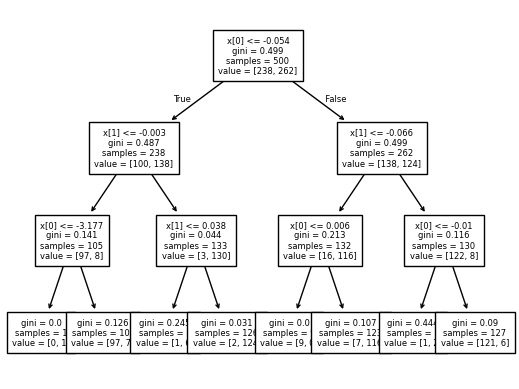

In [51]:
# Task 3c - Decision Tree
from sklearn import tree

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train[["x0", "x1"]], train["y"])
tree.plot_tree(clf, fontsize=6)
plt.savefig('tree_mission2.pdf')

# Calculate accuracy
y_pred = clf.predict(test[["x0", "x1"]])
accuracy = np.mean(y_pred == test["y"])
print("Accuracy: " + str(accuracy))

AUC: 0.95


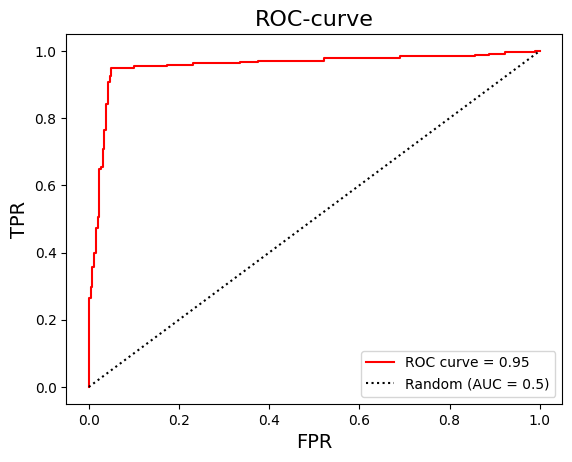

In [52]:
# Task 3d - ROC curve
from sklearn import metrics

prob_predictions = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)

plt.plot(fpr, tpr, label=f'ROC curve = {auc}', c='red')
plt.plot([0, 1], [0, 1], c='black', ls='dotted', label='Random (AUC = 0.5)')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('ROC-curve', fontsize=16)
plt.legend()

print(f"AUC: {auc}")


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [53]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train["data_stream_3"] = (train["data_stream_3"] * 1000) % 2
test["data_stream_3"] = (test["data_stream_3"] * 1000) % 2

# from seaborn import pairplot
# pairplot(train, hue='target', diag_kind='kde')

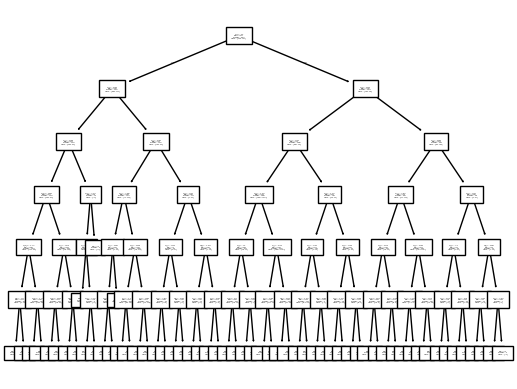

Accuracy: 0.812


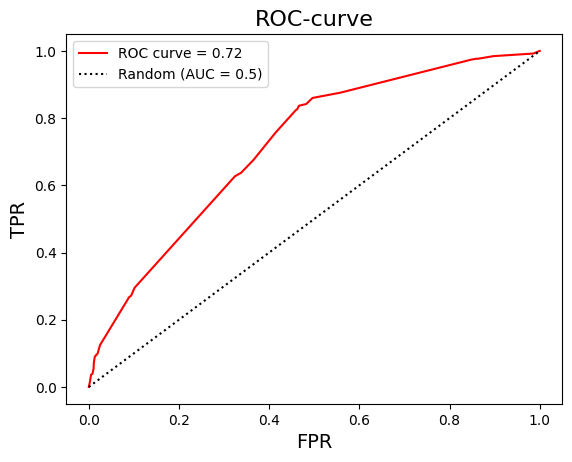

AUC: 0.72


In [54]:
from sklearn import tree
from sklearn import metrics

# Define X and y
X_train = train.iloc[:, :11]
y_train = train["target"]
X_test = test.iloc[:, :11]
y_test = test["target"]

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
tree.plot_tree(clf, fontsize=1)
plt.savefig('tree_mission3.pdf')
plt.show()

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy: " + str(accuracy))

# ROC-curve calculations
prob_predictions = clf.predict_proba(X_test)[:, 1] # Probability of being class 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)

#Plot the ROC-curve
plt.plot(fpr, tpr, label=f'ROC curve = {auc}', c='red')
plt.plot([0, 1], [0, 1], c='black', ls='dotted', label='Random (AUC = 0.5)')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('ROC-curve', fontsize=16)
plt.legend()
plt.show()

print(f"AUC: {auc}")

# clf.feature_importances_

### Mission 3 - Discussion:

    Questions:

    a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

    b. Justify ROC AUC usage. Plot and interpret ROC.
   
    c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

    Answers:

    a) My strategy was to transform the data in data_stream_3 as these values were very different from all the others. I tried seperating the values based on wether they were odd or even if I multiplied them by 1000. I also adjusted the hyperparameter regarding max_depth of the decision tree. This helped me achive a ROC AUC of exactly 0.72. 

    b) The ROC-curve has been plotted above. This is a reasonable value as it will guess right 72% of the time.

    c) sklearn's Random Forest Classifier has been implemented below. It gets mostly the same result as my implementation.

Accuracy: 0.8145


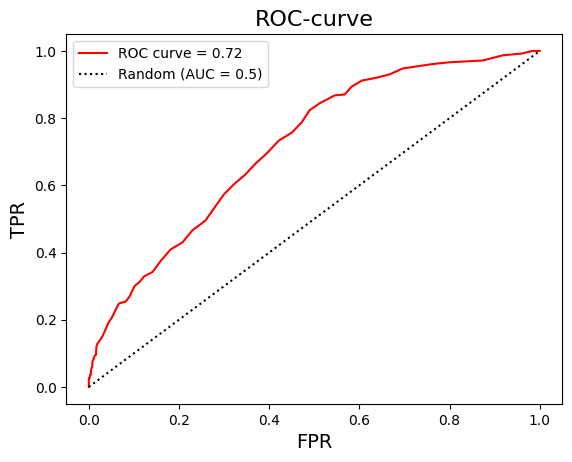

AUC: 0.72


In [55]:
from sklearn import ensemble

# train = pd.read_csv('mission3_train.csv')
# test = pd.read_csv('mission3_test.csv')

# # Define X and y
# X_train = train.iloc[:, :11]
# y_train = train["target"]
# X_test = test.iloc[:, :11]
# y_test = test["target"]

clf = ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy: " + str(accuracy))

# ROC-curve calculations
prob_predictions = clf.predict_proba(X_test)[:, 1] # Probability of being class 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)

#Plot the ROC-curve
plt.plot(fpr, tpr, label=f'ROC curve = {auc}', c='red')
plt.plot([0, 1], [0, 1], c='black', ls='dotted', label='Random (AUC = 0.5)')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('ROC-curve', fontsize=16)
plt.legend()
plt.show()

print(f"AUC: {auc}")


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [56]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

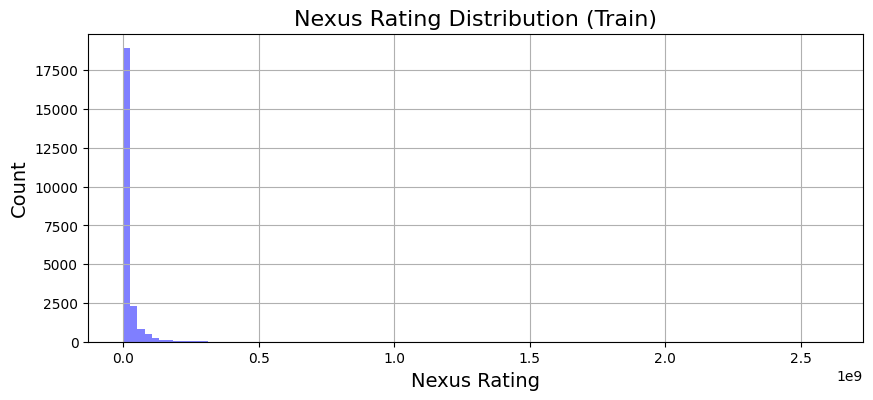

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [58]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

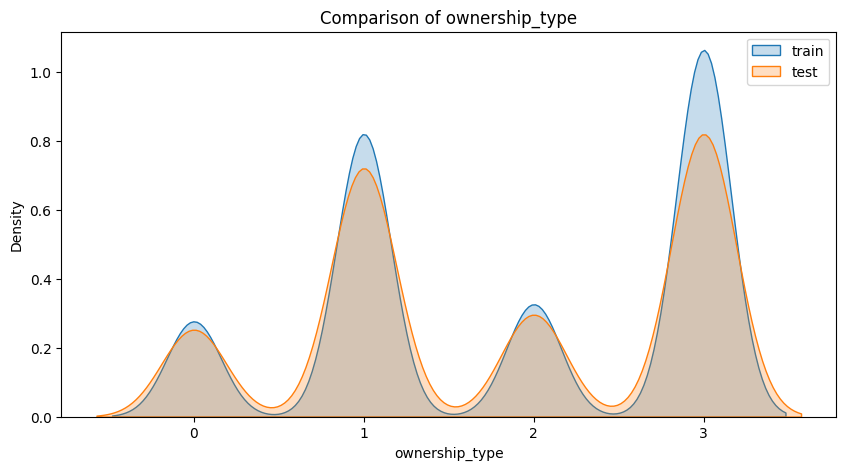

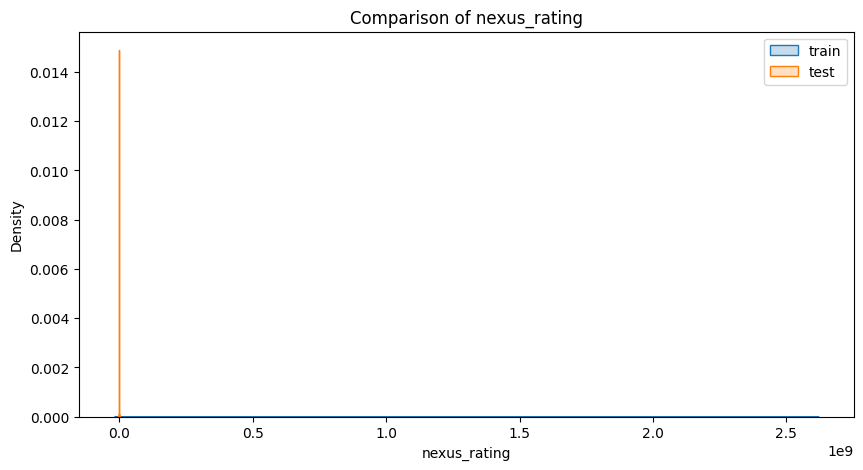

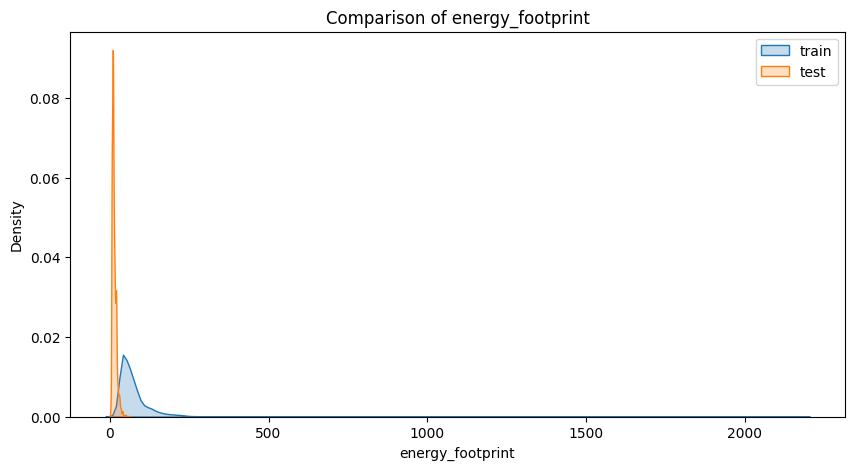

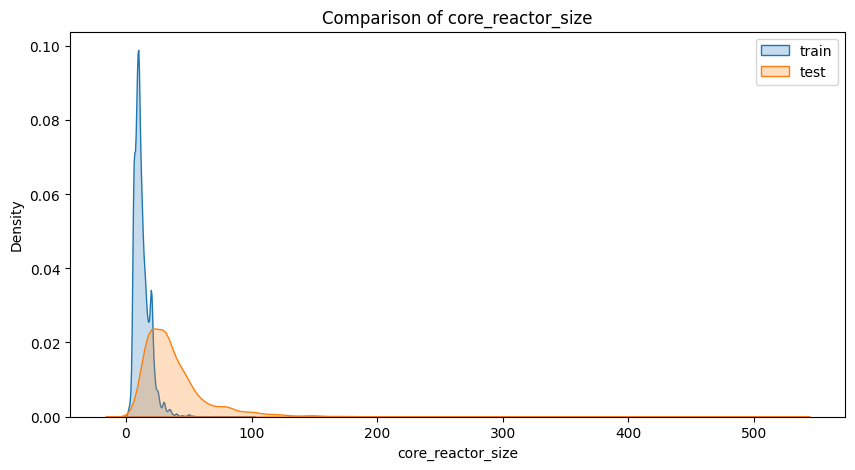

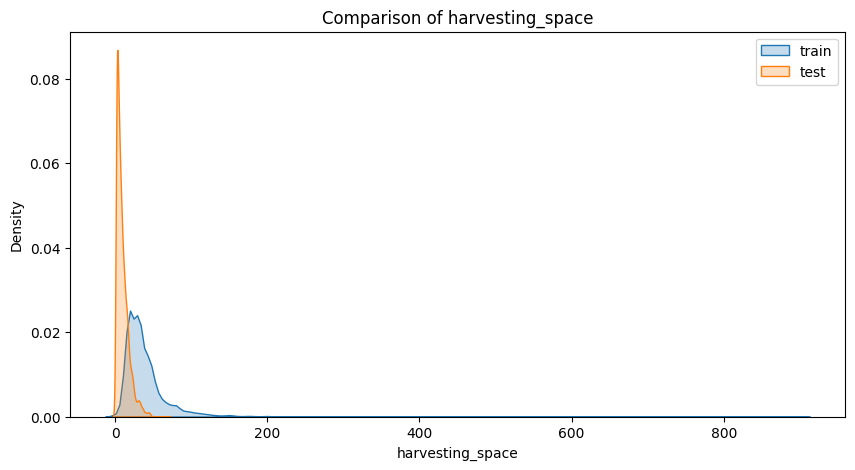

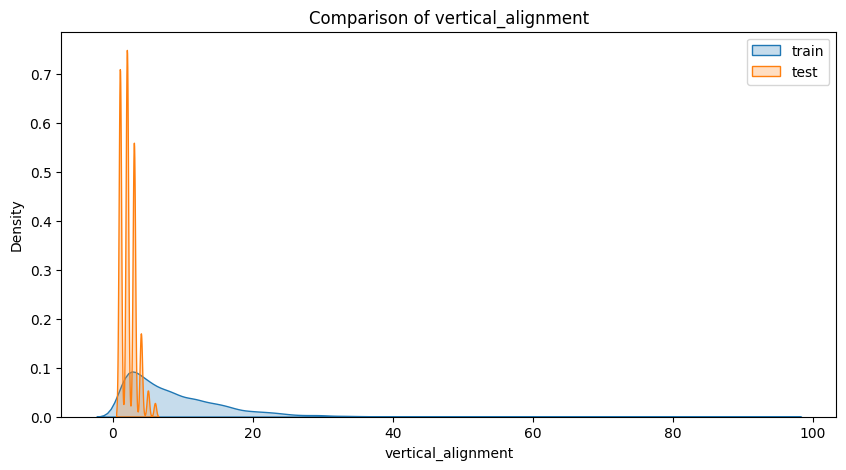

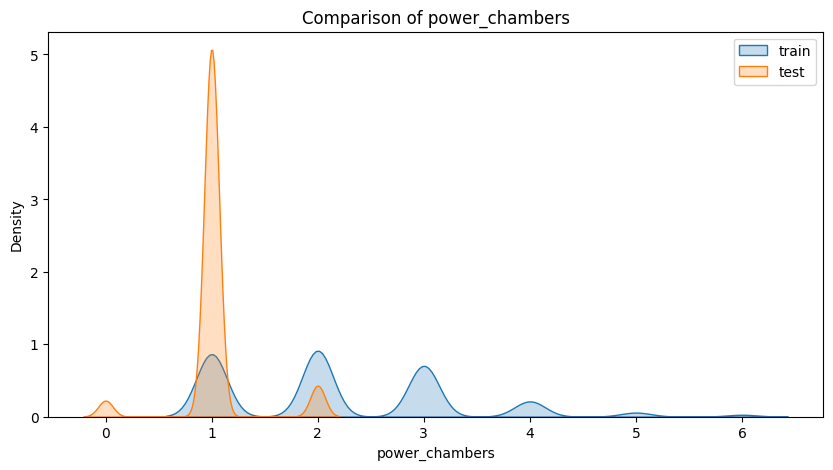

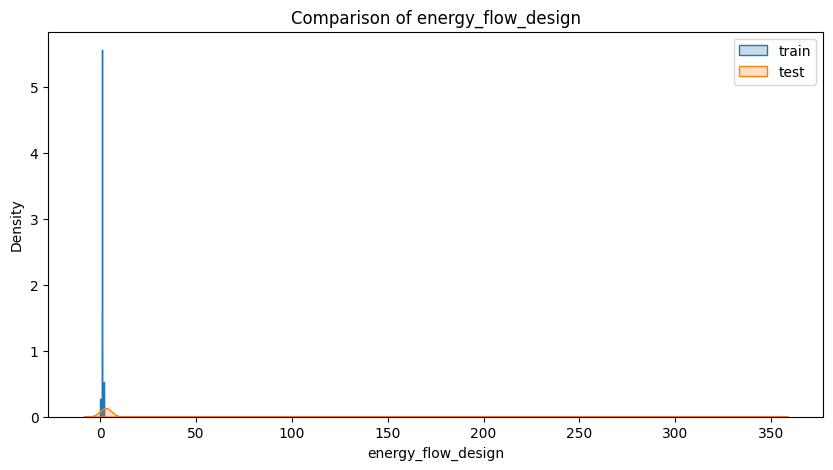

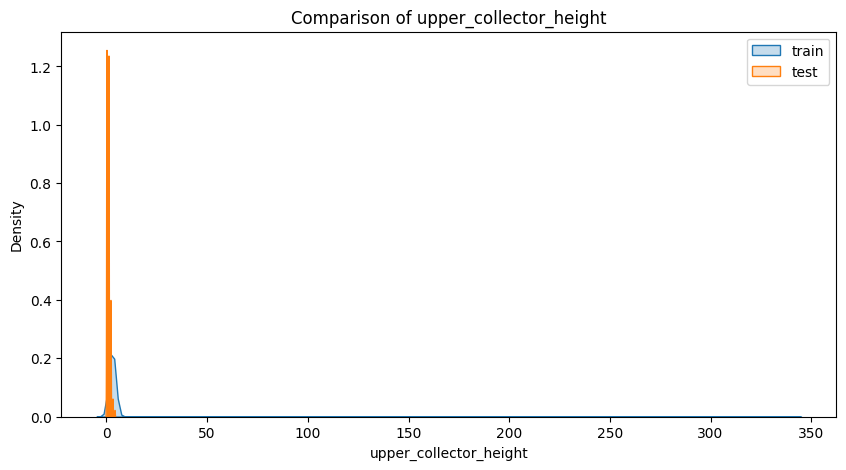

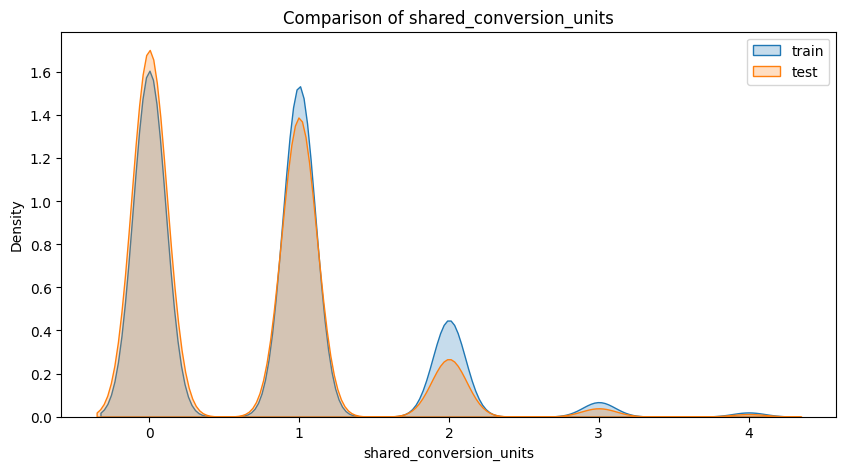

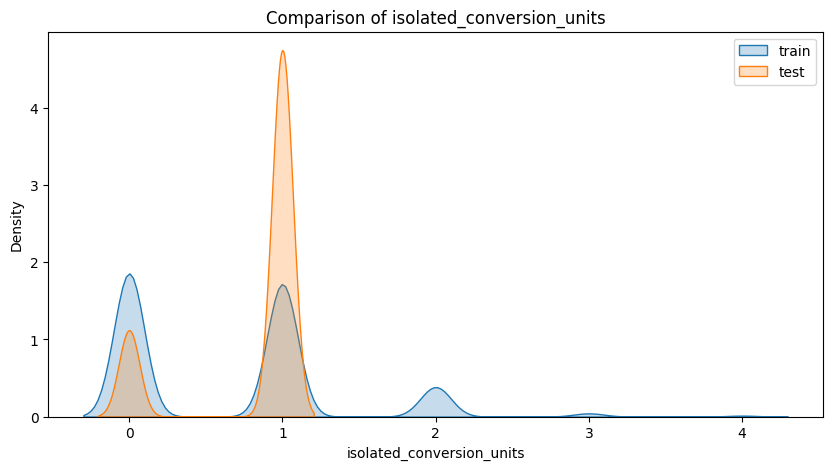

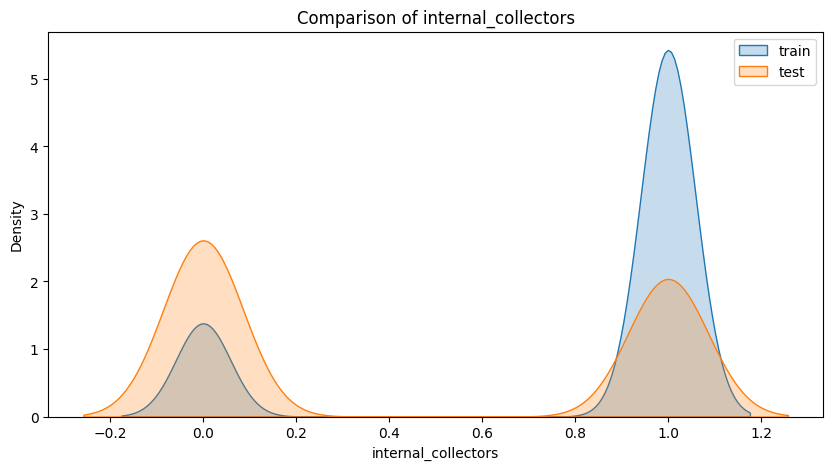

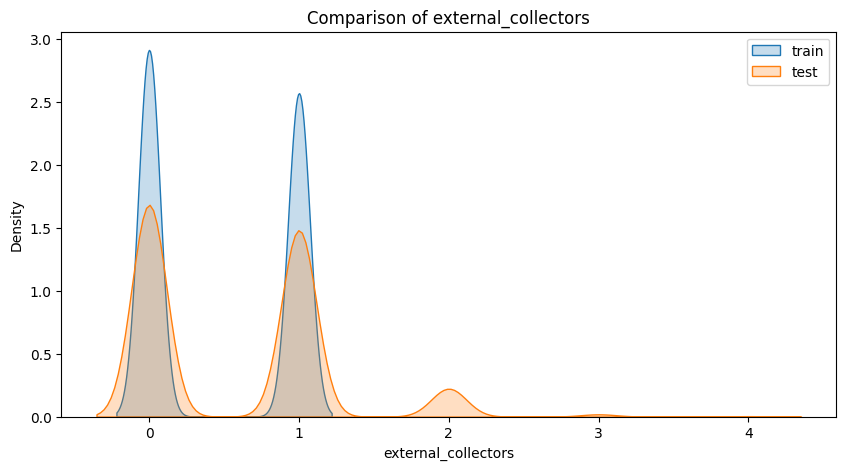

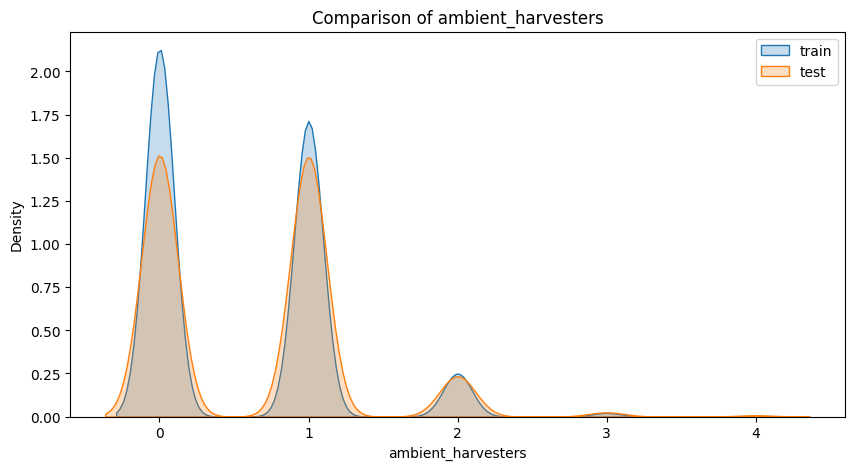

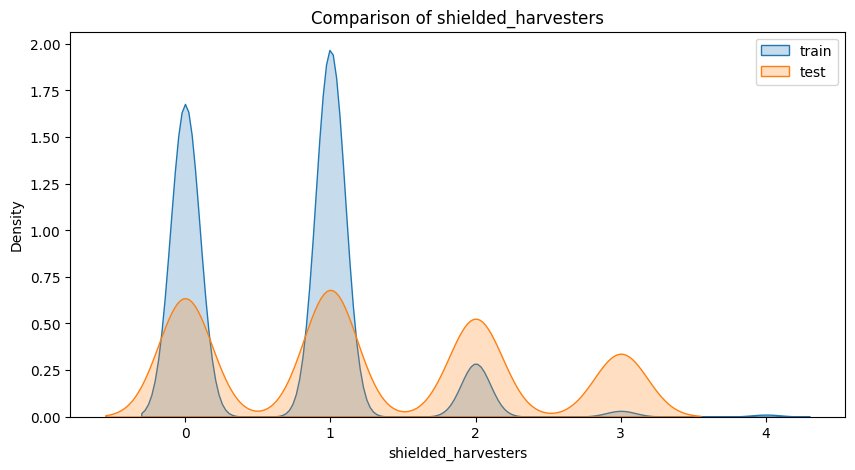

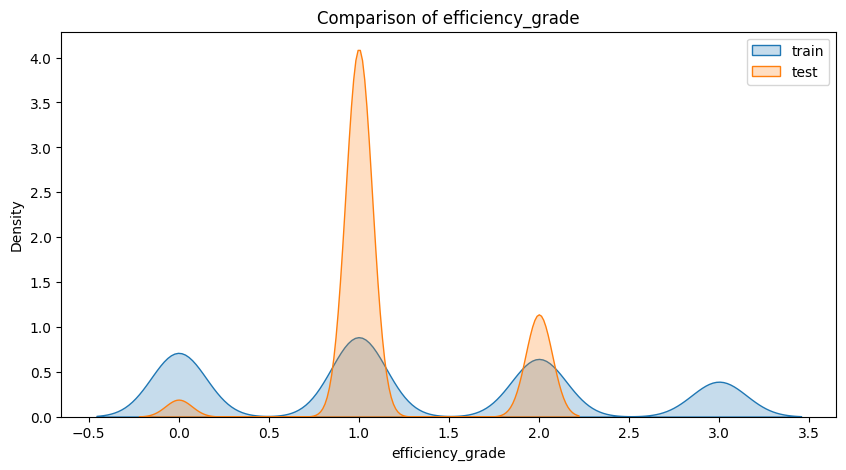

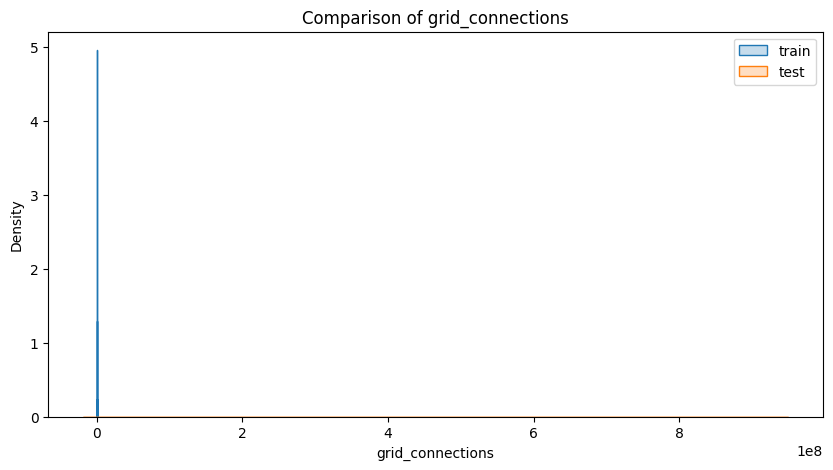

In [59]:
# This plots the distributions of all the features with no changes made
import seaborn as sns

# Compare the datasets based on common columns
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]) and pd.api.types.is_numeric_dtype(test[col]):
        plt.figure(figsize=(10, 5))
        sns.kdeplot(train[col].dropna(), label='train', fill=True)
        sns.kdeplot(test[col].dropna(), label='test', fill=True)
        plt.title(f'Comparison of {col}')
        plt.legend()
        plt.show()


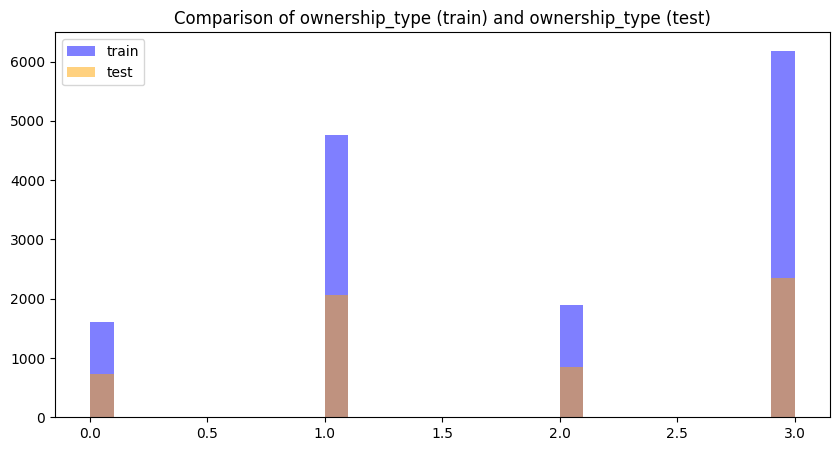

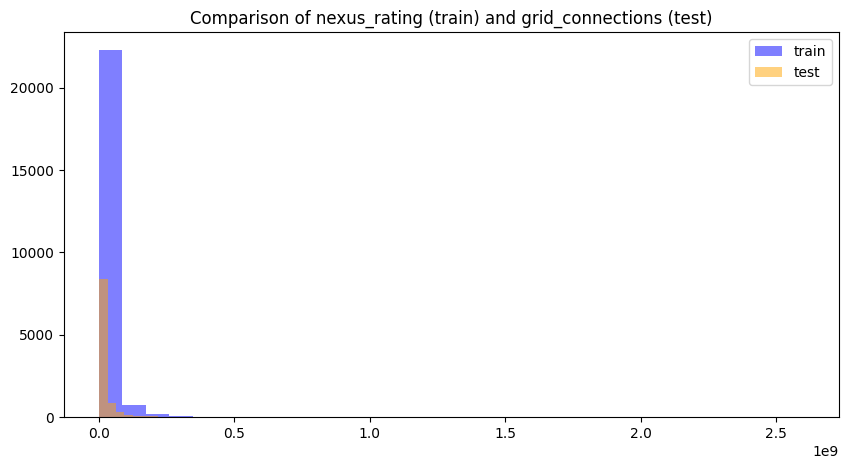

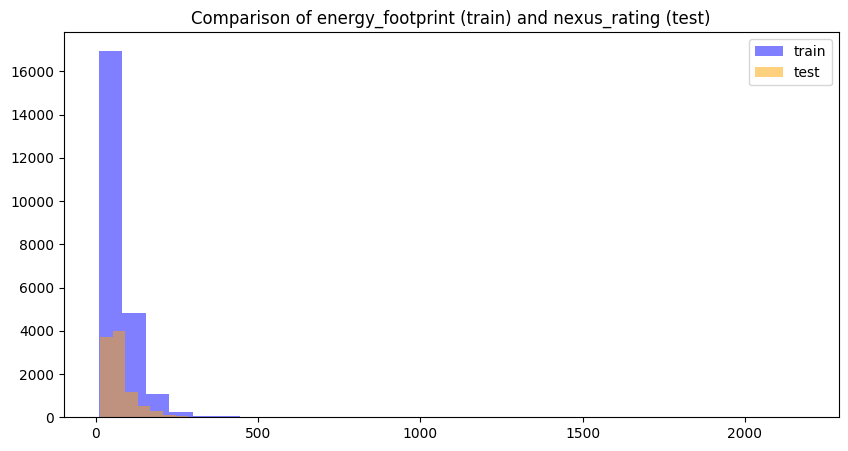

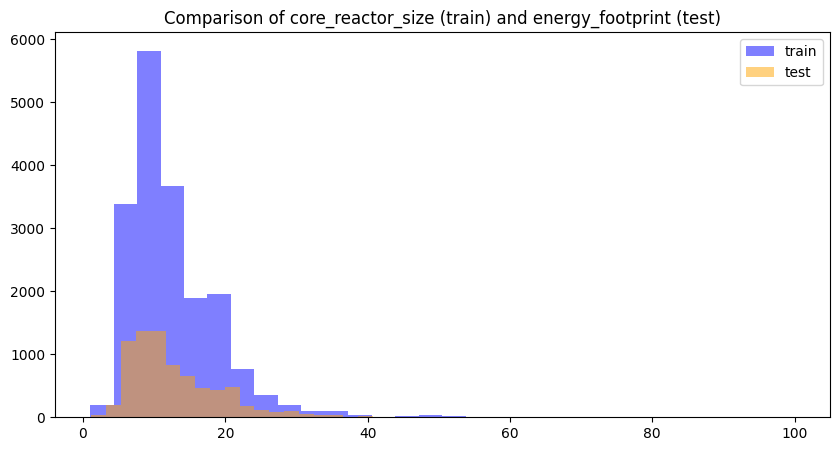

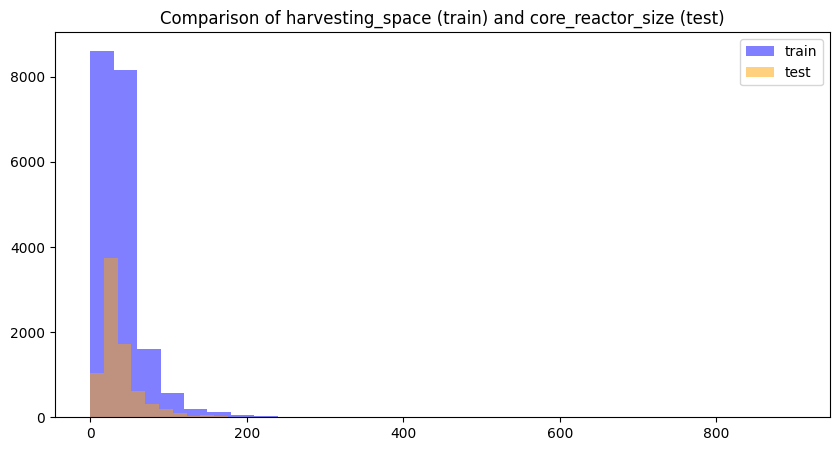

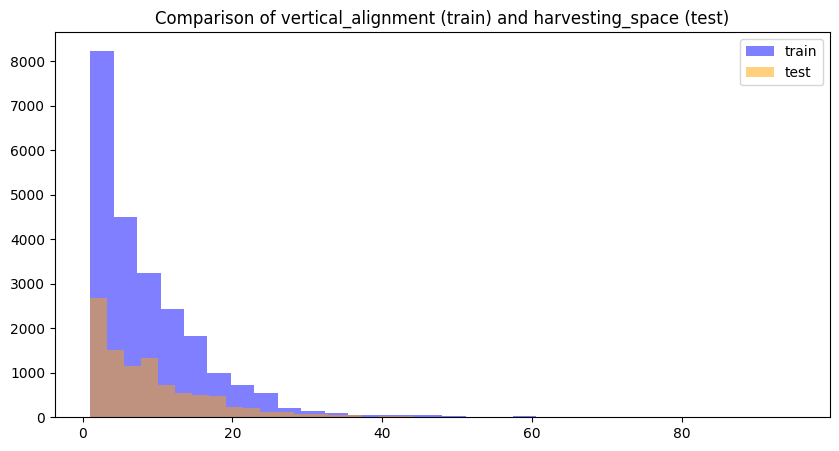

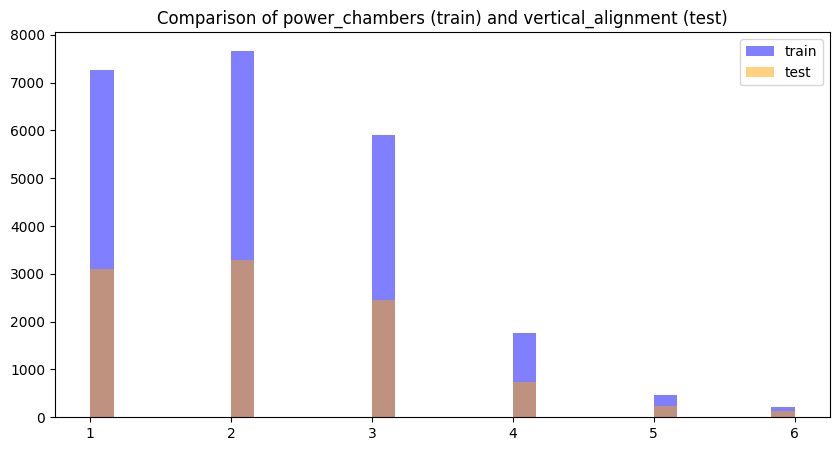

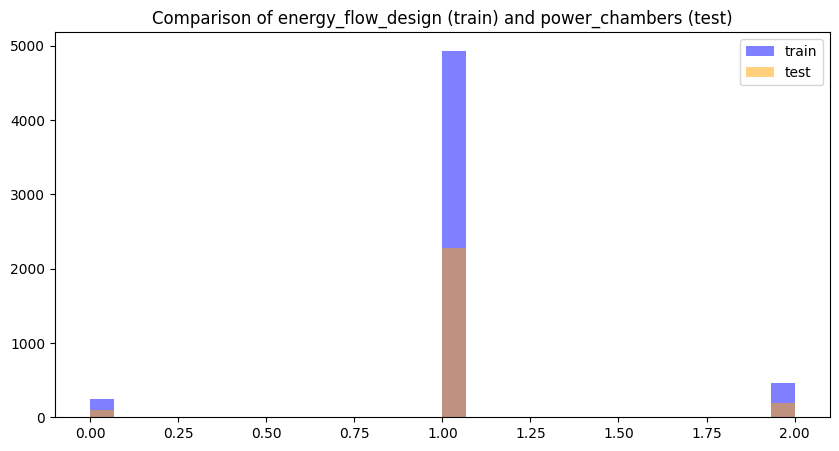

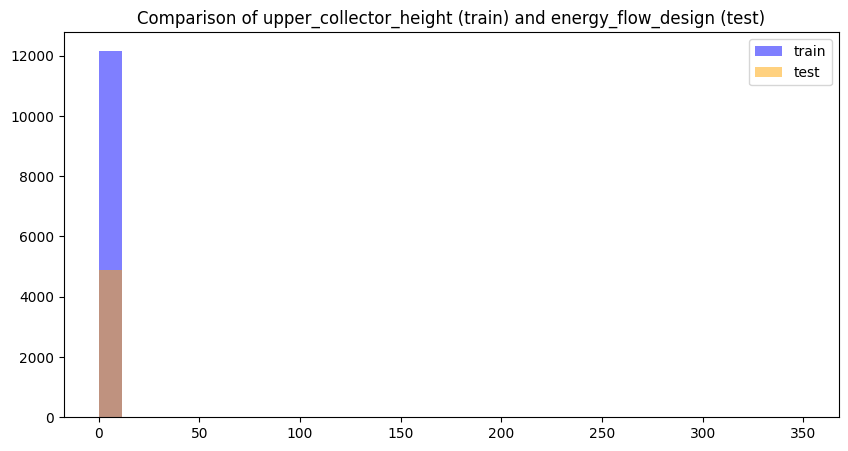

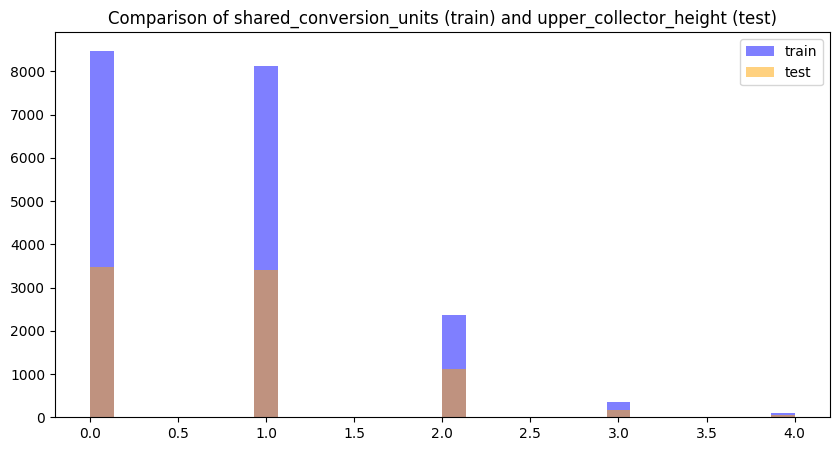

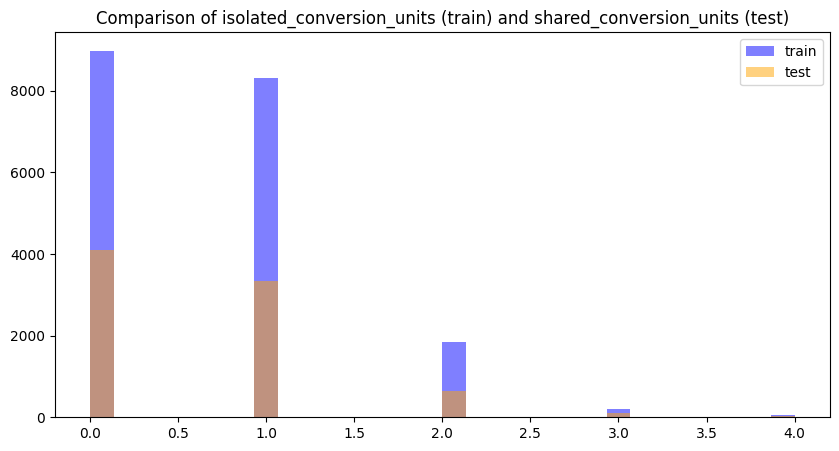

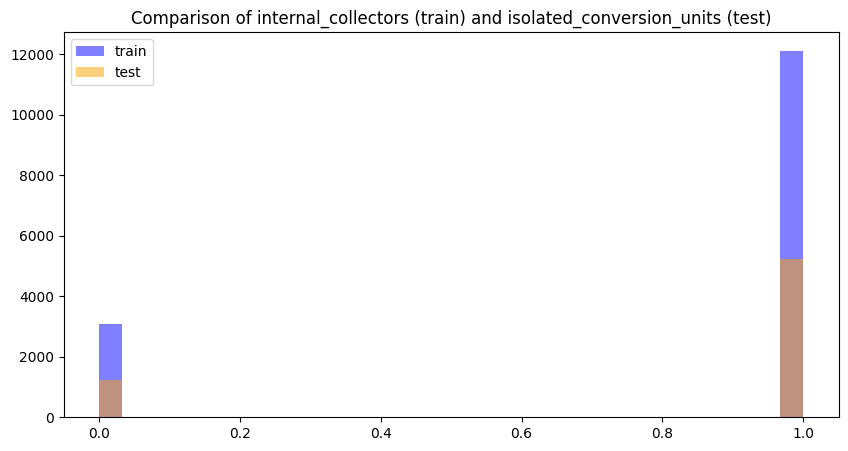

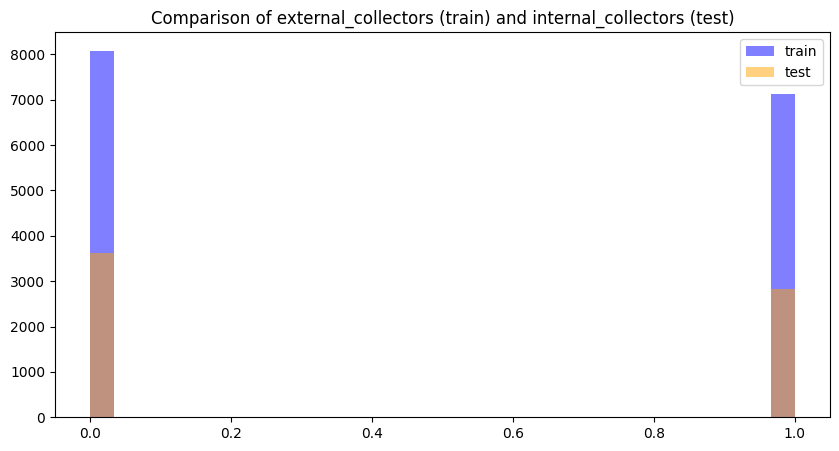

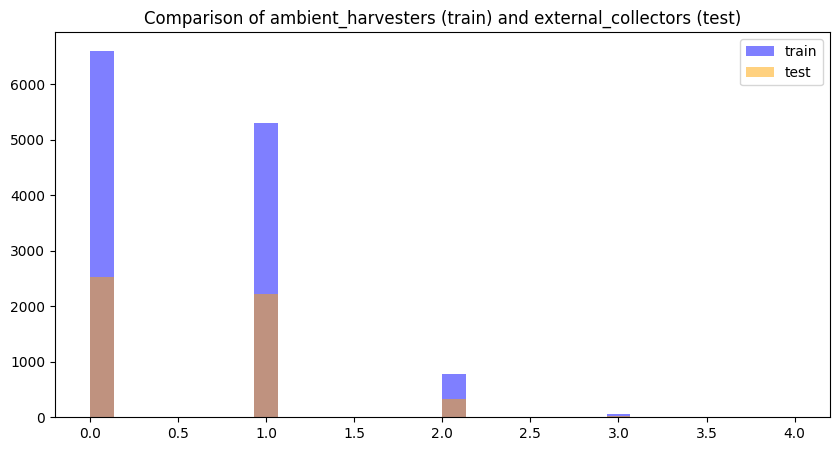

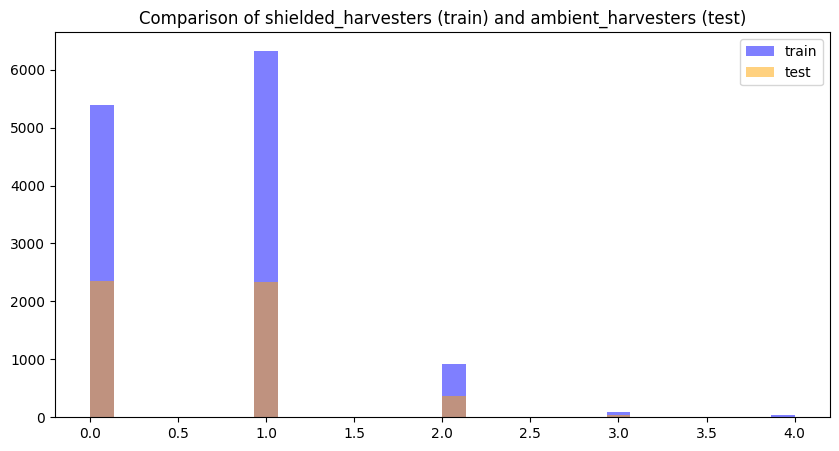

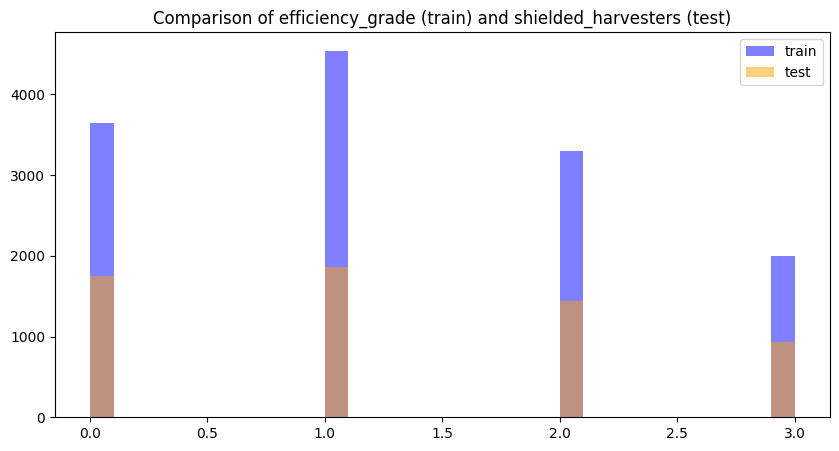

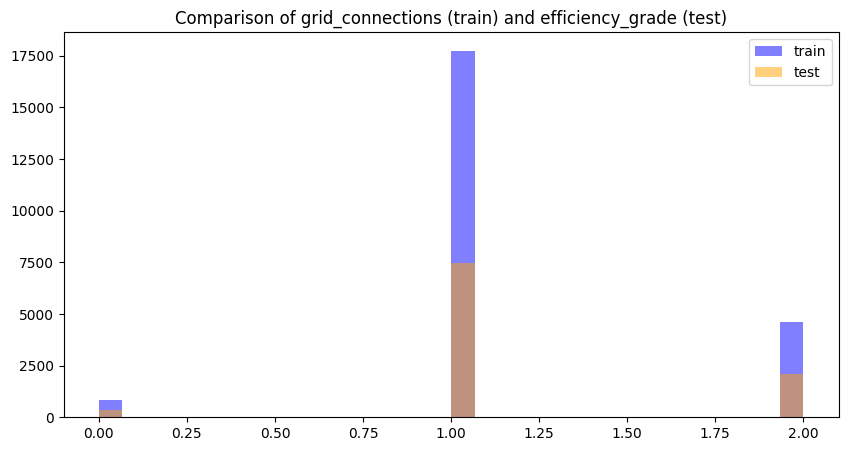

In [60]:
# This plots the distributions of all the features where the test data has been shiften one step to the right (+ change of the first and second feature)
features_test = np.array(test.columns)
rolled_features_test = np.roll(features_test, 1) # Shift the test features one step to the right
feat_zero = rolled_features_test[0]
rolled_features_test[0] = rolled_features_test[1] # Change the first feature to the second
rolled_features_test[1] = feat_zero # Change the second feature to the first

features_train = np.array(train.columns)

# Iterate over the columns and plot histograms for each feature
for i in range(len(features_train)):
    trainX = train[features_train[i]]
    testX = test[rolled_features_test[i]]
    
    # Plot histograms for train and test
    plt.figure(figsize=(10, 5))
    plt.hist(trainX.dropna(), bins=30, alpha=0.5, label='train', color='blue')
    plt.hist(testX.dropna(), bins=30, alpha=0.5, label='test', color='orange')
    plt.title(f'Comparison of {features_train[i]} (train) and {rolled_features_test[i]} (test)')
    plt.legend()
    plt.show()

In [61]:
# Ensemble learning with CatBoost
from catboost import CatBoostRegressor

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

# Same code from above
features_train = np.array(train.columns)
rolled_features_test = np.roll(features_test, 1)
feat_zero = rolled_features_test[0]
rolled_features_test[0] = rolled_features_test[1]
rolled_features_test[1] = feat_zero

y_train = train["nexus_rating"]
y_test = test["grid_connections"]

x_train = train[np.delete(features_train, 1)]
x_test = test[np.delete(rolled_features_test, 1)]
x_test.columns = x_train.columns

categorical_cols = ['ownership_type', 'efficiency_grade', 'power_chambers', 'shared_conversion_units',
                        'isolated_conversion_units', 'internal_collectors', 'external_collectors',
                        'ambient_harvesters', 'shielded_harvesters', 'grid_connections', 'energy_flow_design']

for col in categorical_cols:
    x_train[col] = x_train[col].astype('str')
    x_test[col] = x_test[col].astype('str')

# Modeling with CatBoost
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.035,
    depth=10,
    cat_features=categorical_cols,
    verbose=50
)

y_train = np.log1p(y_train)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_pred = np.expm1(y_pred)

#example rmsle check
print('RMSLE: ', rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)


C:\Users\krist\AppData\Local\Temp\ipykernel_23512\589369007.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = x_train[col].astype('str')
C:\Users\krist\AppData\Local\Temp\ipykernel_23512\589369007.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = x_test[col].astype('str')
C:\Users\krist\AppData\Local\Temp\ipykernel_23512\589369007.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0:	learn: 0.8409902	total: 105ms	remaining: 3m 29s
50:	learn: 0.3720953	total: 5.18s	remaining: 3m 18s
100:	learn: 0.3151823	total: 10.3s	remaining: 3m 13s
150:	learn: 0.2964789	total: 15.8s	remaining: 3m 13s
200:	learn: 0.2843943	total: 21s	remaining: 3m 7s
250:	learn: 0.2748970	total: 25.9s	remaining: 3m
300:	learn: 0.2675250	total: 31.1s	remaining: 2m 55s
350:	learn: 0.2607855	total: 36.3s	remaining: 2m 50s
400:	learn: 0.2548071	total: 41.4s	remaining: 2m 45s
450:	learn: 0.2500197	total: 46.8s	remaining: 2m 40s
500:	learn: 0.2450500	total: 51.5s	remaining: 2m 34s
550:	learn: 0.2408211	total: 56.4s	remaining: 2m 28s
600:	learn: 0.2374742	total: 1m 1s	remaining: 2m 22s
650:	learn: 0.2340306	total: 1m 5s	remaining: 2m 16s
700:	learn: 0.2308122	total: 1m 10s	remaining: 2m 10s
750:	learn: 0.2277913	total: 1m 15s	remaining: 2m 5s
800:	learn: 0.2255132	total: 1m 20s	remaining: 2m
850:	learn: 0.2229475	total: 1m 25s	remaining: 1m 55s
900:	learn: 0.2202782	total: 1m 30s	remaining: 1m 50s
950

### Mission 4 - Discussion:

    Questions:

    a. Explain your threshold-breaking strategy

    b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

    c. Plot and interpret feature importances

    d. Describe your ensembling techniques

    e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

    Answers:

    a) First, I started plotting the distributions of each feature of train and test. I quickly saw that the distributions did not match up. It also looked like everything was shifted one space. When I shifted every feature one space, only two was not matching up. I switched these two and now everything was looking good. Now I knew which feature in train that should be matched up with which feature in test. I used CatBoostRegressor to train on the provided data. I also had to specify which coloumns was categorical to achive a better result. This still did not help me get RMSLE under 0.294. As it turns out CatBoost is using RMSE and not RMSLE. I therefore had to take the natural log of y_train first and then the exponent after on y_pred. This way I got an RMSLE of 0.2938.

    b) The data provided was very different in magnitude. RMSLE works really well in this kind of data. The logarithmic transformation reduces sensitivity to large errors by not overshadowing small values. This is why we use this metric since it focuses on the relative error between the predicted and actual values. I ended up using RMSLE after applying the logaritmic transformation.

    c) Feature importances has been plotted below. From this plot, we can see that energy_footprint has really high importance. It is highly likely that this is where we find the most useful information, since it has a stronger influence on the outcome.

    d) I used CatBoost for boosting, which iteratively trains weak learners (these are decision trees), focusing more on correcting mistakes in predicted samples made by these. This helps the model learn from its mistakes and improve overall accuracy.

    e) In this case it would be good to use a technique like k-fold cross-validation. By splitting the training data into k subsets, we can train the model k times, each time using a different subset. This will be more reliable when we test it on unseen data. If the test data is not completely skewed, then this method will work.

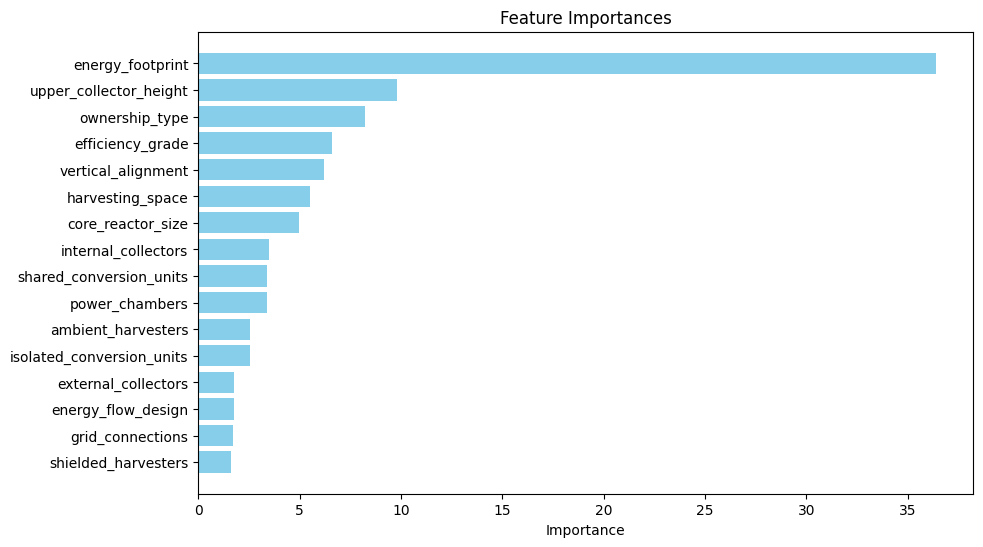

In [62]:
# Discussion 4c)
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()